In [1]:
%pip install WordCloud
%pip install stop-words
%pip install nltk


%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.parsing.preprocessing import remove_stopwords

import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.util import ngrams
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joao0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [108]:
def display_words_cloud(csv_file_name):
    input_data = []
    with open(csv_file_name, errors ='replace') as f:    
        for row in csv.reader(f, delimiter='@', quoting=csv.QUOTE_NONE):
            input_data += row

            
    def extract_ngrams(data, num):
        n_grams = ngrams(nltk.word_tokenize(data), num)
        return [ ' '.join(grams) for grams in n_grams]
           
    words = []
    for data in input_data:
        for word in data.split(' '):
            words.append(word.lower())
            
            
    
    
        
    words =' '.join([i for i in words if i == " " or i.isalpha()])
    bigrams = []
    trigrams = []
    for tweet_soup in input_data:
        tweet = ''.join([i for i in tweet_soup if i == " " or i.isalpha()])
        bigrams.append(extract_ngrams(tweet,2)) 
        trigrams.append(extract_ngrams(tweet,3)) 
      
    bigrams = [x for x in bigrams if x != []]
    trigrams = [x for x in trigrams if x != []]
    
    res_bigram_analyse = {'words' : [],
                         'repeated' : []
                         }
    res_trigram_analyse = {'words' : [],
                         'repeated' : []
                          }
    def for_res_gram(grams, res):
        for gram in grams:
            for wordsB in gram:
                if wordsB not in res['words']:
                    res['words'].append(wordsB) 
                    res['repeated'].append(sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(wordsB), words)))
    
    for_res_gram(bigrams, res_bigram_analyse)
    for_res_gram(trigrams, res_trigram_analyse)
    
#     res_bigram_analyse = sorted(res_bigram_analyse.items(), key=lambda x:x[1], reverse=True)
#     res_trigram_analyse = sorted(res_trigram_analyse.items(), key=lambda x:x[1], reverse=True)
    
    df_res_bigram_analyse = pd.DataFrame(res_bigram_analyse)
    df_res_trigram_analyse = pd.DataFrame(res_trigram_analyse)
    print("le resultats pour les recurences de bigram est " , df_res_bigram_analyse)
    print("le resultats pour les recurences de trigram est " , df_res_trigram_analyse)
    df_res_bigram_analyse.to_csv(f'{csv_file_name[:-4]}res_bigram_analyse.csv')    
    df_res_trigram_analyse.to_csv(f'{csv_file_name[:-4]}res_trigram_analyse.csv')
    
    
    words = remove_stopwords(words)

    
    ## juste a personal creation to check words manuallly
#     dict_words = {}
#     for word in words.split(' '):
#         if len(word) < 4 and word not in dict_words and list(filter(lambda x: x[0] in word,  words.split(' '))).count(word) > 2:
#             dict_words[word] = list(filter(lambda x: x[0] in word,  words.split(' '))).count(word)
    
#     dict_words = sorted(dict_words.items(), key=lambda x:x[1], reverse=True)
   
#     print(dict_words)

   

    # Creating word_cloud with text as argument in .generate() method

    word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                            width = 2048, height = 1080).generate(words)

    plt.imshow(word_cloud1, interpolation='bilinear')
    plt.axis("off")
    plt.show()    

le resultats pour les recurences de bigram est                     words  repeated
0               aoorg Hi         0
1               Hi Thank         0
2              Thank you         0
3                you for         3
4      for understanding         0
...                  ...       ...
10341       Cerulean Sea         0
10342        The Passage         0
10343          The Seven         0
10344     Seven Husbands         0
10345        Husbands of         0

[10346 rows x 2 columns]
le resultats pour les recurences de trigram est                         words  repeated
0             aoorg Hi Thank         0
1               Hi Thank you         0
2              Thank you for         0
3      you for understanding         0
4       for understanding If         0
...                      ...       ...
11802        in the Cerulean         0
11803       the Cerulean Sea         0
11804     The Seven Husbands         0
11805      Seven Husbands of         0
11806     Husbands of Evelyn

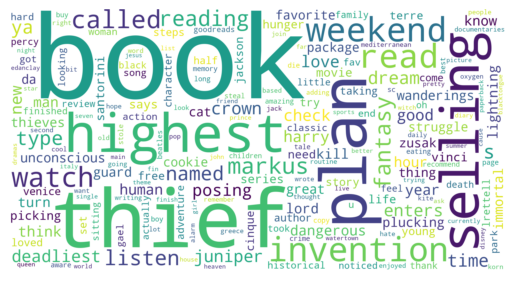

In [109]:
display_words_cloud('the_book_thief.csv')

le resultats pour les recurences de bigram est                 words  repeated
0             If you         0
1           you know        19
2           know the        11
3          the enemy        46
4          enemy amp         0
...              ...       ...
18501         D Fair         0
18502      Fair game         0
18503      game well         0
18504      well done         2
18505  done everyone         0

[18506 rows x 2 columns]
le resultats pour les recurences de trigram est                      words  repeated
0             If you know         0
1            you know the         8
2          know the enemy         5
3           the enemy amp         0
4          enemy amp know         0
...                   ...       ...
21246          war D Fair         0
21247         D Fair game         0
21248      Fair game well         0
21249      game well done         0
21250  well done everyone         0

[21251 rows x 2 columns]


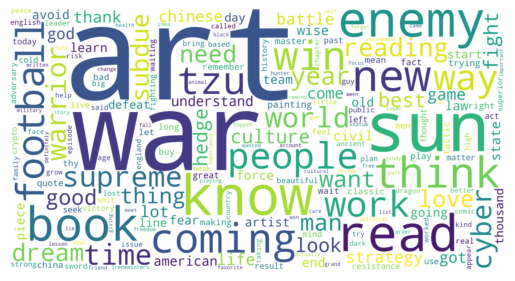

In [110]:
display_words_cloud('the_art_of_war.csv')

In [ ]:
display_words_cloud('the_picture_of_dorian_grey.csv')

In [ ]:
display_words_cloud('the_song_of_achilles.csv')